In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

batch_size = 32
img_height = 32
img_width = 32

unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)
num_classes = len(unique_labels)
batch_size = 32
img_height = 32
img_width = 32
data_augmentation = Sequential(
  [ 
    layers.RandomFlip("horizontal", 
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
);

#use 3x3 filter
base_model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,
  layers.Conv2D(60, (3,3), strides=(1,1),padding='valid', activation='relu'), #(7x7) kernal size  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.AveragePooling2D((2,2), strides=(2,2)), #2x2 pool size , stide 2 -> move 2 moves every window
  layers.Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'), #same padding -> pad in a way to keep output dim same as input dim
  layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,),
  layers.ReLU(),  # activation function
  layers.AveragePooling2D((2,2), strides=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(200, activation="relu"),
  layers.Dense(num_classes),
])


base_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 10
history_bn_model_filter = base_model.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)


Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Epoch 1/10
1563/1563 - 63s - 41ms/step - accuracy: 0.1308 - loss: 3.7836 - val_accuracy: 0.1599 - val_loss: 3.5889
Epoch 2/10
1563/1563 - 85s - 54ms/step - accuracy: 0.2230 - loss: 3.2045 - val_accuracy: 0.2161 - val_loss: 3.2861
Epoch 3/10
1563/1563 - 86s - 55ms/step - accuracy: 0.2663 - loss: 2.9625 - val_accuracy: 0.1862 - val_loss: 3.4826
Epoch 4/10
1563/1563 - 1079s - 690ms/step - accuracy: 0.2919 - loss: 2.8310 - val_accuracy: 0.2938 - val_loss: 2.8161
Epoch 5/10
1563/1563 - 519s - 332ms/step - accuracy: 0.3113 - loss: 2.7319 - val_accuracy: 0.3138 - val_loss: 2.7231
Epoch 6/10
1563/1563 - 77s - 50ms/step - accuracy: 0.3269 - loss: 2.6578 - val_accuracy: 0.3349 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3744 - loss: 4.1543
Test Accuracy: 0.37209999561309814


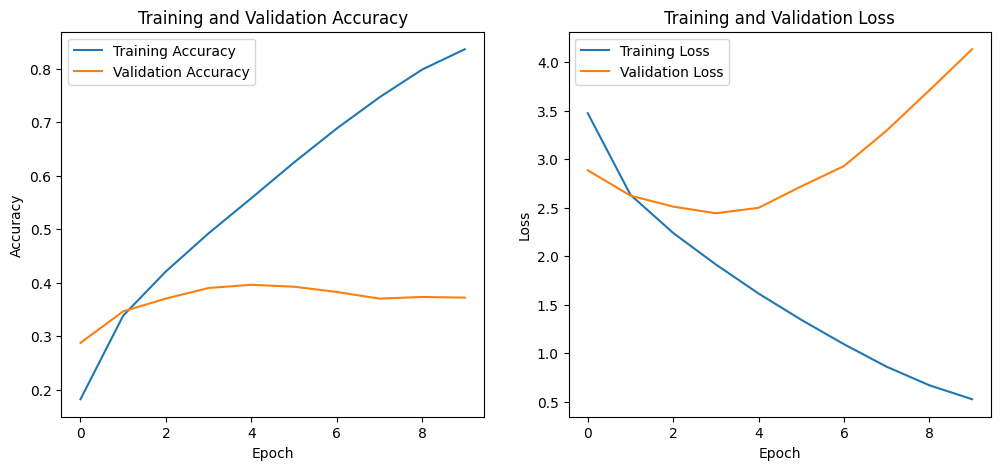

In [5]:

# Evaluate the model
test_loss, test_accuracy = base_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()